In [ ]:
!pip install gymnasium
!pip install gymnasium[toy_text]
!pip install gymnasium[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install imageio==2.4.1
!pip install --upgrade imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gymnasium as gym
import pygame
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time 
import os, sys
import random
import matplotlib.pyplot as plt
os.environ["SDL_VIDEODRIVER"] = "dummy"
pygame.init()
screen = pygame.display.set_mode((800,400))

random.seed(10)

#CliffWalking

In [ ]:
gym.make("CliffWalking-v0")

<OrderEnforcing<PassiveEnvChecker<CliffWalkingEnv<CliffWalking-v0>>>>

In [ ]:
def render():
        color = (255, 100, 0)
        pygame.display.flip()
        view = pygame.surfarray.array3d(screen)
        view = view.transpose([1, 0, 2])
        img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
        return img_bgr


##Image render in CliffWalking

In [ ]:
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

def display_video(video):
    fig = plt.figure(figsize=(9,6))  #Display size specification

    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=150, repeat_delay=1000)

    plt.close()
    return anime

In [ ]:
# this function is reffered from : https://github.com/TUIlmenauAMS/Videocoding/blob/main/seminars/vc_seminar01_support.ipynb
def img_to_video(img_arr,path,fps):
  h,w,layers = img_arr[0].shape
  size = (w,h)
  out = cv2.VideoWriter(path,cv2.VideoWriter_fourcc(*'DIVX'),fps,size)
  for i in range(len(img_arr)):
    out.write(img_arr[i])
  out.release

In [ ]:
# this function is reffered from :  https://github.com/TUIlmenauAMS/Videocoding/blob/main/seminars/vc_seminar01_support.ipynb
def img_to_vid(q,path):
  env = gym.make('CliffWalking-v0',render_mode="human")
  state = env.reset()[0]
  iter = 0
  img = []
  while True:
    iter+=1
    A = np.argmax(q[state])
    nxt_state,r,temp,info,extra = env.step(A)
    #print(state,A)
    img.append(render())
    
    state = nxt_state
    if(temp == True or iter>=100):
      break
  (img_to_video(img,path,4))

In [ ]:
env = gym.make('CliffWalking-v0',render_mode="none")
env.reset()
tf=env.P

/usr/local/lib/python3.8/dist-packages/gymnasium/envs/registration.py:628: UserWarning: WARN: The environment is being initialised with render_mode='none' that is not in the possible render_modes (['human', 'rgb_array', 'ansi']).
  logger.warn(


In [ ]:
for i in range(10):
  next_state, reward, done,_,__= env.step(np.random.randint(0,4))
  render()

In [ ]:
num_s=len(env.P)
num_a=len(env.P[0])
env.step(0)
# next state,reward,is terminal, is truncated,prob

(13, -1, False, False, {'prob': 1.0})

In [ ]:
def qlearn(alpha,epsilon,max_step,num_ep):
  ep_reward=[] 
  avg_ep_reward=[]
  ep=[]

  for i in range(num_ep): # iterating through all the episodes
    s=env.reset()[0]
    terminate = False
    total_r = 0
    ep_no=0
    q=np.full((num_s,num_a),-50)
    while(True): # terminate till policy terminated
      ep_no+=1

      tmp1=random.random() #epsilon greedy policy
      if(tmp1<=epsilon):
        a=random.randint(0,num_a-1)
      else:
        a = np.argmax(q[s])

      next_s, r, terminate, t1, _ = env.step(a)
      q[s][a]+= alpha*(r + gamma*np.max(q[next_s])-q[s][a])

      s=next_s
      total_r+=r
      if(terminate==True or ep_no > max_step):
        #print(i)
        break
    ep_reward.append(total_r)
    avg_rerward=np.average(ep_reward[-max_step:])
    avg_ep_reward.append(avg_rerward)
    ep.append(i)
  sum_of_rewards=np.sum(ep_reward)
  return q,avg_ep_reward,ep,sum_of_rewards


### Q1) Q-learning agent using a purely random behavior policy for different learning rated



For learning rate = 0.0005 epsilon= 1


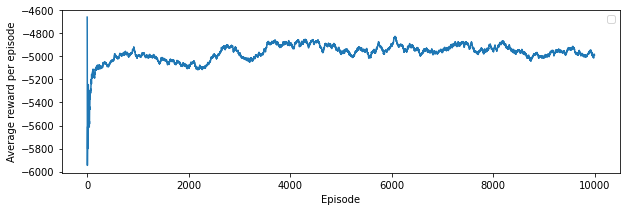

0


For learning rate = 0.005 epsilon= 1


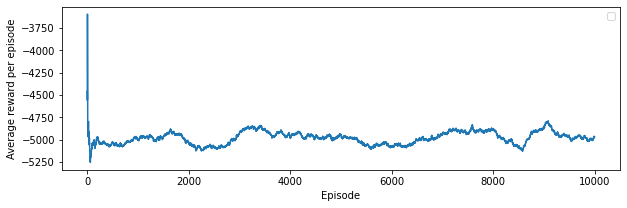

1


For learning rate = 0.01 epsilon= 1


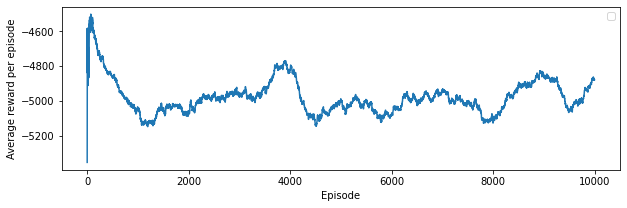

2


For learning rate = 0.07 epsilon= 1


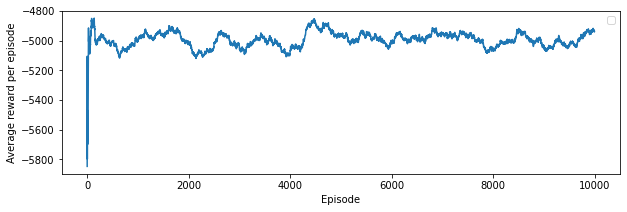

3


For learning rate = 0.1 epsilon= 1


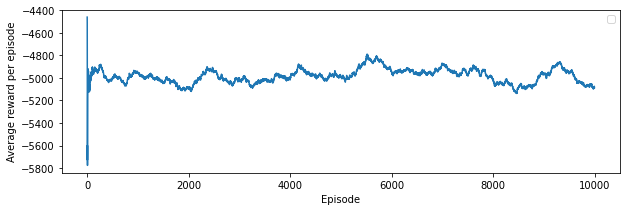

4


Text(0.5, 1.0, 'Total reward by policy vs alpha')

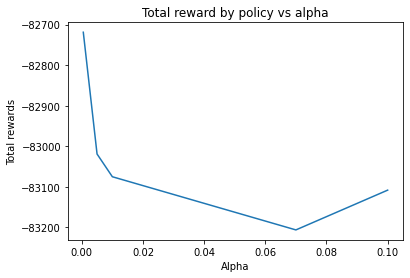

In [ ]:
# Q1
alpha =[0.0005,0.005,0.01,0.07,0.1]
epsilon= [1] # for random policy behavior
num_ep=10000
mx_ep=500
gamma=0.99
itr=0
sum_of_rewards_at_alpha=np.zeros(5)
q_learn_random=[]

for lr in alpha: 
  q=np.zeros((num_s,num_a))
  for eps in epsilon:
    q,avg_ep_reward,ep,sum_of_rewards=qlearn(lr,eps,mx_ep,num_ep)
    q_learn_random.append(q)

    # ploting the data
    plt.figure(figsize = (10,3))
    plt.legend()
    plt.xlabel('Episode')
    plt.ylabel('Average reward per episode')
    #plt.title()
    print("For learning rate =",lr,"epsilon=",eps)
    plt.plot(ep,avg_ep_reward)
    plt.show()
    print(itr)
  sum_of_rewards_at_alpha[itr]=int(sum_of_rewards/600)
  itr+=1
plt.plot(alpha,sum_of_rewards_at_alpha)
plt.xlabel('Alpha')
plt.ylabel('Total rewards')
plt.title('Total reward by policy vs alpha')

Ans 1)
As learning rate increase from 0.005 to 0.1 the random policy gives a little scatter total rewards but in we can see that as learning rate increase the total negative reward increase. 

All the plots are shown above

In [ ]:
path = './cwq2.mp4'
img_to_vid(q_learn_random[0],path)
video = imageio.mimread(path)
HTML(display_video(video).to_html5_video())

In [ ]:
path = './cwq3.mp4'

img_to_vid(q_learn_random[1],path)
video = imageio.mimread(path) 
HTML(display_video(video).to_html5_video()) 


In [ ]:
path = './cwq4.mp4'

img_to_vid(q_learn_random[2],path)
video = imageio.mimread(path) 
HTML(display_video(video).to_html5_video()) 


In [ ]:
path = './cwq5.mp4'

img_to_vid(q_learn_random[3],path)
video = imageio.mimread(path) 
HTML(display_video(video).to_html5_video()) 


In [ ]:
path = './cwq6.mp4'

img_to_vid(q_learn_random[4],path)
video = imageio.mimread(path) 
HTML(display_video(video).to_html5_video()) 


## Q2

/usr/local/lib/python3.8/dist-packages/gymnasium/envs/registration.py:628: UserWarning: WARN: The environment is being initialised with render_mode='none' that is not in the possible render_modes (['human', 'rgb_array', 'ansi']).
  logger.warn(


For learning rate = 0.0001 epsilon= 0.95


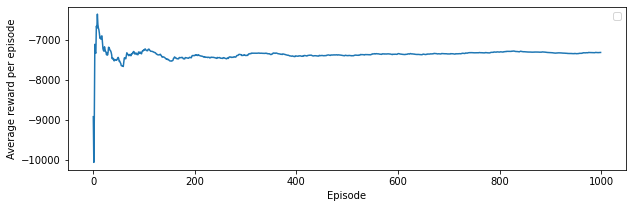

For learning rate = 0.0001 epsilon= 0.76


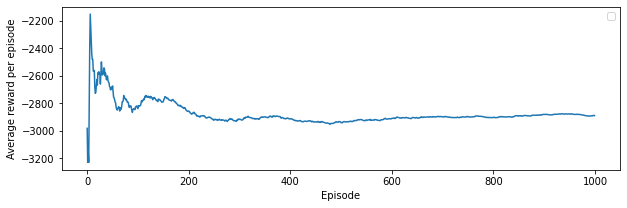

For learning rate = 0.0001 epsilon= 0.55


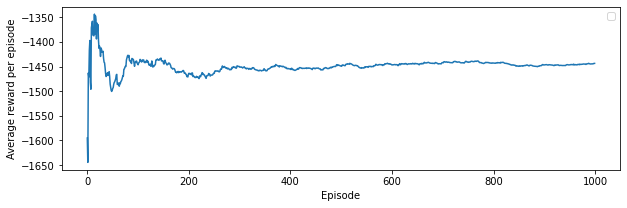

For learning rate = 0.0001 epsilon= 0.25


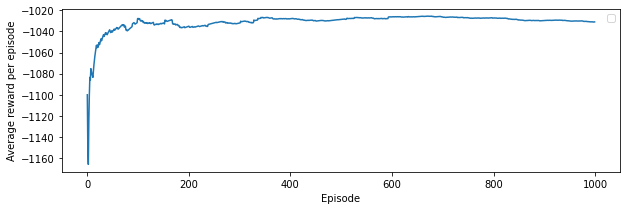

For learning rate = 0.0001 epsilon= 0.1


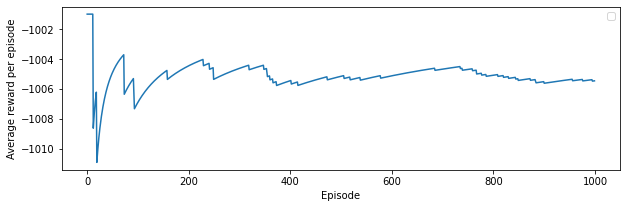

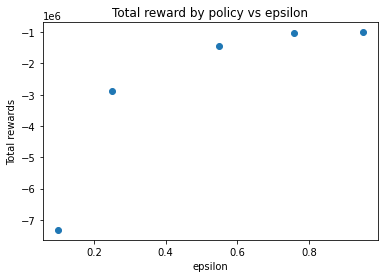

In [ ]:
# Q2
env = gym.make('CliffWalking-v0',render_mode="none")
env.reset()
alpha =[0.0001]
epsilon= [0.95, 0.76, 0.55, 0.25, 0.1]
num_ep=1000
mx_ep=1000
gamma=0.99
sum_of_rewards_at_eps=np.zeros(5)
itr=5
q_learn_epsgreedy=[]
time_epsgreedy=[]

for eps in epsilon:
  q=np.zeros((num_s,num_a))
  itr-=1
  for lr in alpha:
    start = time.time()
    q,avg_ep_reward,ep,sum_of_rewards=qlearn(lr,eps,mx_ep,num_ep)
    end = time.time()
    time_epsgreedy.append(end-start) #calculating time for plot

    q_learn_epsgreedy.append(q)
    # ploting the data
    plt.figure(figsize = (10,3))
    plt.legend()
    plt.xlabel('Episode')
    plt.ylabel('Average reward per episode')
    #plt.title()
    print("For learning rate =",lr,"epsilon=",eps)
    plt.plot(ep,avg_ep_reward)
    plt.show()
  sum_of_rewards_at_eps[itr]=sum_of_rewards

plt.xlabel('epsilon')
plt.ylabel('Total rewards')
plt.title('Total reward by policy vs epsilon')
plt.scatter(epsilon,sum_of_rewards_at_eps)


Ans 2) We can see a direct relation between epsilon and reward as we increase epsilon your reward increase in epsilon greedy policy

### Video for q learning unsing epsilon greedy for dillerent epsilon

In [ ]:
path = './cwq7.mp4'

img_to_vid(q_learn_epsgreedy[0],path)
video = imageio.mimread(path) 
HTML(display_video(video).to_html5_video()) 


In [ ]:
path = './cwq8.mp4'

img_to_vid(q_learn_epsgreedy[1],path)
video = imageio.mimread(path) 
HTML(display_video(video).to_html5_video()) 


In [ ]:
path = './cwq9.mp4'

img_to_vid(q_learn_epsgreedy[2],path)
video = imageio.mimread(path) 
HTML(display_video(video).to_html5_video()) 


In [ ]:
path = './cwq10.mp4'

img_to_vid(q_learn_epsgreedy[3],path)
video = imageio.mimread(path) 
HTML(display_video(video).to_html5_video()) 


In [ ]:
path = './cwq11.mp4'

img_to_vid(q_learn_epsgreedy[4],path)
video = imageio.mimread(path) 
HTML(display_video(video).to_html5_video()) 


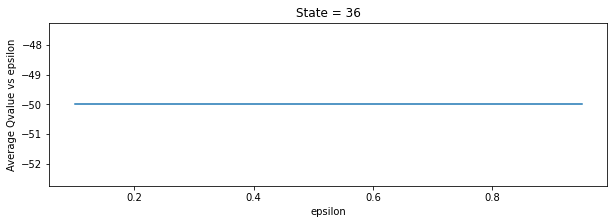

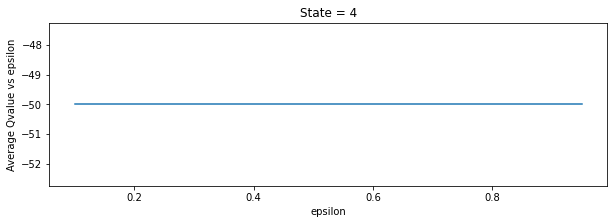

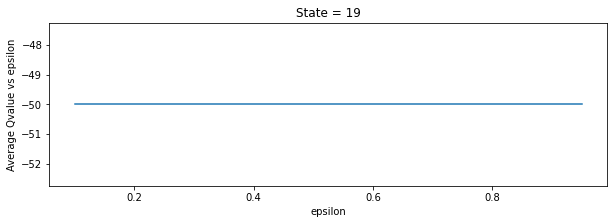

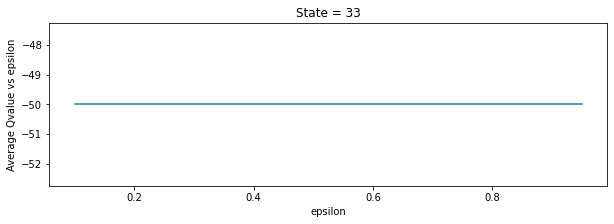

In [ ]:
epsilon = [0.95, 0.76, 0.55, 0.25, 0.1]
s_ = [36, 4, 19, 33]
mx_ep=1000
num_ep=1000
i = 0

Qsa_egreedy = []
for j in s_:
  q_avg=[]
  for epi in epsilon:
    q,avg_ep_reward,ep,sum_of_rewards = qlearn(lr,epi,mx_ep,num_ep)
    avg=(q[j][0] + q[j][1]+q[j][2] + q[j][3])/4
    q_avg.append(avg)
  
  plt.figure(figsize = (10,3))
  plt.plot(epsilon,q_avg)
  plt.title(f'State = {j}')
  plt.xlabel('epsilon')
  plt.ylabel('Average Qvalue vs epsilon')

Ans 3) random policy is just a special case for epsilon greedy policy when epsilon in 1 that is it wxplores with probability 1 and choose greedy action with probability 0

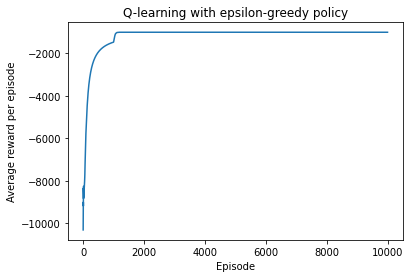

In [ ]:
env = gym.make('CliffWalking-v0',render_mode="none")
def qlearn_reduced(alpha,gamma,max_step,num_ep, red_epsilon=True):
  ep_reward=[] 
  avg_ep_reward=[]
  ep=[]
  epsilon = 1.0
  
  for i in range(num_ep): # iterating through all the episodes
    s=env.reset()[0]
    terminate = False
    total_r = 0
    step_no=0

    while(True): # terminate till policy terminated
      step_no+=1

      tmp1=random.random() #epsilon greedy policy
      if(tmp1<=epsilon):
        a=random.randint(0,num_a-1)
      else:
        a = np.argmax(q[s])

      next_s, r, terminate, t1, _ = env.step(a)
      q[s][a]+= alpha*(r + gamma*np.max(q[next_s])-q[s][a])

      s=next_s
      total_r+=r
      if(terminate==True or step_no > max_step):
        #print(i)
        break
    if red_epsilon:
      epsilon = max(0.01, epsilon * (1 - i/num_ep))
    ep_reward.append(total_r)
    avg_rerward=np.average(ep_reward[-max_step:])
    avg_ep_reward.append(avg_rerward)
    ep.append(i)
  sum_of_rewards=np.sum(ep_reward)
  return q,avg_ep_reward,ep

alpha = 0.1
gamma = 0.9
num_ep = 10000
max_step=1000
q,avg_ep_reward,ep = qlearn_reduced(alpha,gamma,max_step,num_ep, red_epsilon=True)

# Plot learning curve
plt.plot(range(1, num_ep+1), avg_ep_reward)
plt.xlabel('Episode')
plt.ylabel('Average reward per episode')
plt.title('Q-learning with epsilon-greedy policy')
plt.show()

here we cana see that as we increase the number of episodes linearly our model learn exponentaly

In [ ]:
path = './cwq13.mp4'

img_to_vid(q,path)

video = imageio.mimread(path)
HTML(display_video(video).to_html5_video())  


#Lunar lander

In [ ]:
# this function is reffered from : https://web.stanford.edu/class/aa228/reports/2019/final8.pdf
def discret(s):
    state = (min(5, max(-5, int((s[0]) / 0.05))), \
            min(5, max(-1, int((s[1]) / 0.1))), \
            min(3, max(-3, int((s[2]) / 0.1))), \
            min(3, max(-3, int((s[3]) / 0.1))), \
            min(3, max(-3, int((s[4]) / 0.1))), \
            min(3, max(-3, int((s[5]) / 0.1))), \
            int(s[6]), \
            int(s[7]))
    return state

In [ ]:
def img_to_vid_lunarlander(q,path):
  env = gym.make('LunarLander-v2',render_mode="human")
  state = env.reset()[0]

  state = tuple(state)
  state = discret(state)
  iter = 0
  img = []
  while True:
    iter += 1
    action = np.argmax(q.get(state))
    next_state, reward, done, info,_ = env.step(action)
    print(state, action)
    img.append(render())
    next_state = tuple(next_state)
    next_state = discret(next_state)
    state = next_state
    if done or iter >= 100:
        break
  (img_to_video(img,path,4))

In [ ]:
def img_to_video_landerlander(img_arr,path,fps):
  h,w,layers = img_arr[0].shape
  size = (w,h)
  out = cv2.VideoWriter(path,cv2.VideoWriter_fourcc(*'DIVX'),fps,size)
  for i in range(len(img_arr)):
    out.write(img_arr[i])
  out.release

In [ ]:
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

def display_video_lunarlander(video):
    fig = plt.figure(figsize=(9,6))  #Display size specification
    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])
    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=200, repeat_delay=1000)
    plt.close()
    return anime

In [ ]:
import gymnasium as gym
env = gym.make("LunarLander-v2",render_mode="none")

/usr/local/lib/python3.8/dist-packages/gymnasium/envs/registration.py:628: UserWarning: WARN: The environment is being initialised with render_mode='none' that is not in the possible render_modes (['human', 'rgb_array']).
  logger.warn(


In [ ]:
env.reset()
num_s=len((env.step(0)[0])) # S= {x,y , vx,vy , angle, angluar velocity,left and right leg contact }
num_a=4                     # A= {do nothing,fire left,fire right,fire up}
q=np.zeros((num_s,num_a))
env.step(0)
# env.step(action) = next_state, reward, terminated, truncated , info

(array([ 0.00497093,  1.3937632 ,  0.16759954, -0.28051382, -0.00566907,
        -0.0375497 ,  0.        ,  0.        ], dtype=float32),
 -1.8169825005462599,
 False,
 False,
 {})

In [ ]:
def epsilon_greedy(s,q,epsilon):
  tmp1=random.random() #epsilon greedy policy
  if(tmp1<epsilon):
    return random.randint(0,num_a-1)
  else:
    if s in q:
      return np.argmax(q.get(s))
    else:
      return np.argmax([0,0,0,0])

In [ ]:
env = gym.make("LunarLander-v2",render_mode="none")
env.reset()

def sarsa(alpha,num_ep,mx_step,epsilon):
  q_states = {}
  reward_list = []
  episode_list = []
  max_time_step_list=[]
  ep_no = 0
  terminate = False
  
  for i in range(num_ep): # Loop for each episode
    st=time.time()
    ep_no+=1
    s = env.reset()[0]
    s = tuple(s)
    s = discret(s)
    a = epsilon_greedy(s,q_states,eps)
    itr=0
    total_r = 0

    while True:
      itr+=1
      next_s, r, terminate, t1,t2 = env.step(a)
      next_s = discret(next_s)
      total_r+=r
      next_s = tuple(next_s)
      a_ = epsilon_greedy(next_s,q_states,eps)
      
      if s not in q_states:
        q_states[s] = np.zeros(4)
      if next_s not in q_states:
          q_states[next_s] = np.zeros(4)
      q_states[s][a] += alpha * (r + gamma * q_states[next_s][a_] - q_states[s][a])

      s = next_s
      a  = a_
      if(terminate == True or itr>mx_step):
        #print(ep_no)
        end=time.time()
        break
    max_time_step=end-st
    max_time_step_list.append(max_time_step)
    episode_list.append(ep_no)
    reward_list.append(total_r)

  return q_states,reward_list,episode_list,max_time_step_list


In [ ]:
def expectedsarsa(alpha,num_ep,mx_step,epsilon):
  q_states = {}
  reward_list = []
  episode_list = []
  max_time_step_list=[]
  ep_no = 0
  terminate = False
  for i in range(num_ep): # Loop for each episode
    st=time.time()
    ep_no+=1
    s = env.reset()[0]
    s = tuple(s)
    s = discret(s)
    a = epsilon_greedy(s,q_states,eps)
    itr=0
    total_r = 0

    while True:
      itr+=1
      env.reset()
      next_s, r, terminate, t1,t2 = env.step(a)
      next_s = discret(next_s)
      total_r+=r
      next_s = tuple(next_s)
      a_ = epsilon_greedy(next_s,q_states,eps)

      # Update the Q-value of the current state-action pair
      if s in q_states:
          if next_s in q_states:
              z = 0
              for i, q_val in enumerate(q_states[next_s]):
                  if i == a_:
                      z += (1 - eps) * q_val
                  else:
                      z += eps * q_val
              q_states[s][a] += alpha * (r+gamma*z - q_states[s][a])
          else:
              q_states[next_s] = np.zeros(num_a)
              q_states[s][a] += alpha * (r - q_states[s][a])
      else:
          q_states[s] = np.zeros(num_a)
          q_states[next_s] = np.zeros(num_a)
          q_states[s][a] += alpha * (r-q_states[s][a])
      s=next_s
      a=a_

      if(terminate == True or itr>mx_step):
        end=time.time()
        #print(ep_no)
        break
    episode_list.append(ep_no)
    max_time_step_list.append((end-st)*100)
    reward_list.append(total_r)
  return q_states,reward_list,episode_list,max_time_step_list


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1500
For learning rate = 0.01 epsilon= 0.1
For learning rate = 0.01 epsilon= 0.1


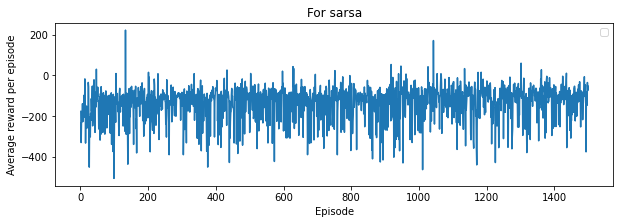

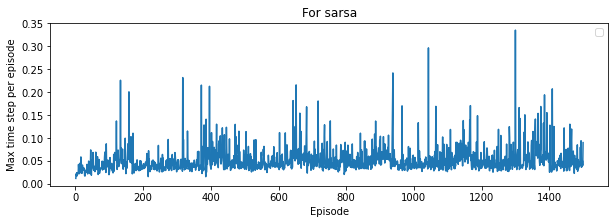

In [ ]:
# Q1
env = gym.make("LunarLander-v2",render_mode="none")
env.reset()
alpha = [0.01]
epsilon= [0.1]
num_ep=1500
mx_step=500
gamma=0.99
sum = []

sarsa_qfunction = []
expectedsarsa_qfunction = []

for eps in epsilon:
  for lr in alpha:
    
    q1,reward1,eps1,max_time_step1=sarsa(lr,num_ep,mx_step,eps)
    q2,reward2,eps2,max_time_step2=expectedsarsa(lr,num_ep,mx_step,eps)
    sarsa_qfunction.append(q1)
    expectedsarsa_qfunction.append(q2)

    # ploting the data for sarsa
    plt.figure(figsize = (10,3))
    plt.legend()
    plt.xlabel('Episode')
    plt.ylabel('Average reward per episode')
    plt.title('For sarsa')
    print("For learning rate =",lr,"epsilon=",eps)
    plt.plot(eps1,reward1)

    plt.figure(figsize = (10,3))
    plt.legend()
    plt.xlabel('Episode')
    plt.ylabel('Max time step per episode')
    plt.title('For sarsa')
    print("For learning rate =",lr,"epsilon=",eps)
    plt.plot(eps1,max_time_step1)
    plt.show()

For learning rate = 0.01 epsilon= 0.1
For learning rate = 0.01 epsilon= 0.1


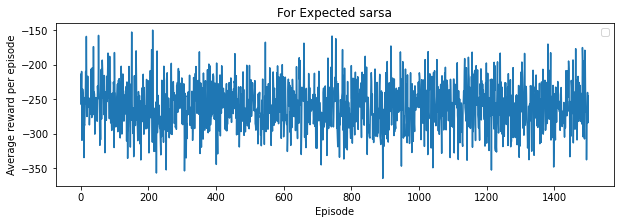

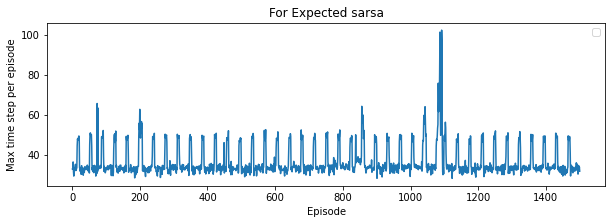

In [ ]:
for eps in epsilon:
  for lr in alpha:
    # ploting the data for expectedsarsa
    plt.figure(figsize = (10,3))
    plt.legend()
    plt.xlabel('Episode')
    plt.ylabel('Average reward per episode')
    plt.title('For Expected sarsa')
    print("For learning rate =",lr,"epsilon=",eps)
    plt.plot(eps2,reward2)

    plt.figure(figsize = (10,3))
    plt.legend()
    plt.xlabel('Episode')
    plt.ylabel('Max time step per episode')
    plt.title('For Expected sarsa')
    print("For learning rate =",lr,"epsilon=",eps)
    plt.plot(eps2,max_time_step2)
    plt.show()

Video for final stage of learning methord

In [ ]:
path = './lv1.mp4'
img_to_vid_lunarlander(sarsa_qfunction[0],path)
video = imageio.mimread(path)  
HTML(display_video_lunarlander(video).to_html5_video()) 

(0, 5, -1, -2, 0, 0, 0, 0) 2
(0, 5, -1, -2, 0, 0, 0, 0) 2
(0, 5, -1, -2, 0, 0, 0, 0) 2
(0, 5, -2, -2, 0, 0, 0, 0) 2
(0, 5, -1, -2, 0, 0, 0, 0) 2
(0, 5, -2, -1, 0, 0, 0, 0) 2
(0, 5, -2, -1, 0, 0, 0, 0) 2
(0, 5, -2, -1, 0, 0, 0, 0) 2
(0, 5, -2, 0, 0, 0, 0, 0) 3
(0, 5, -2, -1, 0, 0, 0, 0) 2
(0, 5, -2, 0, 0, 0, 0, 0) 3
(0, 5, -2, -1, 0, 0, 0, 0) 2
(0, 5, -2, 0, 0, 0, 0, 0) 3
(0, 5, -2, -1, 0, -1, 0, 0) 2
(0, 5, -2, -1, 0, -1, 0, 0) 2
(0, 5, -2, -1, 0, -1, 0, 0) 2
(0, 5, -2, 0, 0, -1, 0, 0) 3
(0, 5, -2, -1, 0, -1, 0, 0) 2
(0, 5, -2, 0, 0, -1, 0, 0) 3
(0, 5, -1, -1, 0, -2, 0, 0) 2
(0, 5, -1, -1, 0, -2, 0, 0) 2
(0, 5, -1, 0, 0, -2, 0, 0) 3
(0, 5, -1, -1, 0, -2, 0, 0) 2
(-1, 5, -1, -1, -1, -2, 0, 0) 2
(-1, 5, -1, 0, -1, -2, 0, 0) 2
(-1, 5, -1, 0, -1, -2, 0, 0) 2
(-1, 5, -1, 0, -1, -2, 0, 0) 2
(-1, 5, -1, 0, -1, -2, 0, 0) 2
(-1, 5, -1, 0, -1, -2, 0, 0) 2
(-1, 5, -1, 0, -1, -2, 0, 0) 2
(-1, 5, -1, 0, -2, -2, 0, 0) 2
(-1, 5, 0, 0, -2, -2, 0, 0) 2
(-1, 5, 0, 0, -2, -2, 0, 0) 2
(-1, 5, 0, 0, -2, -2

In [ ]:
path = './lv2.mp4'
img_to_vid_lunarlander(expectedsarsa_qfunction[0],path)
video = imageio.mimread(path)  
HTML(display_video_lunarlander(video).to_html5_video()) 

(0, 5, 3, -1, 0, -1, 0, 0) 2
(0, 5, 3, 0, 0, -1, 0, 0) 3
(0, 5, 3, -1, 0, -1, 0, 0) 2
(0, 5, 3, 0, 0, -1, 0, 0) 3
(0, 5, 3, -1, 0, -2, 0, 0) 1
(0, 5, 3, -1, 0, -1, 0, 0) 2
(0, 5, 3, -1, 0, -1, 0, 0) 2
(0, 5, 3, -1, 0, -1, 0, 0) 2
(0, 5, 3, -1, 0, -1, 0, 0) 2
(1, 5, 3, 0, 0, -1, 0, 0) 0
(1, 5, 3, -1, 0, -1, 0, 0) 0
(1, 5, 3, -1, -1, -1, 0, 0) 0
(1, 5, 3, -1, -1, -1, 0, 0) 0
(1, 5, 3, -2, -1, -1, 0, 0) 0
(1, 5, 3, -2, -1, -1, 0, 0) 0
(1, 5, 3, -2, -1, -1, 0, 0) 0
(1, 5, 3, -2, -1, -1, 0, 0) 0
(1, 5, 3, -3, -1, -1, 0, 0) 0
(1, 5, 3, -3, -1, -1, 0, 0) 0
(2, 5, 3, -3, -1, -1, 0, 0) 0
(2, 5, 3, -3, -1, -1, 0, 0) 0
(2, 5, 3, -3, -1, -1, 0, 0) 0
(2, 5, 3, -3, -1, -1, 0, 0) 0
(2, 5, 3, -3, -1, -1, 0, 0) 0
(2, 5, 3, -3, -2, -1, 0, 0) 0
(2, 5, 3, -3, -2, -1, 0, 0) 0
(2, 5, 3, -3, -2, -1, 0, 0) 0
(2, 5, 3, -3, -2, -1, 0, 0) 0
(3, 5, 3, -3, -2, -1, 0, 0) 0
(3, 5, 3, -3, -2, -1, 0, 0) 0
(3, 5, 3, -3, -2, -1, 0, 0) 0
(3, 5, 3, -3, -2, -1, 0, 0) 0
(3, 5, 3, -3, -2, -1, 0, 0) 0
(3, 5, 3, -3, -2, -1, 0,

For learning rate = 0.0005 epsilon= 0.9


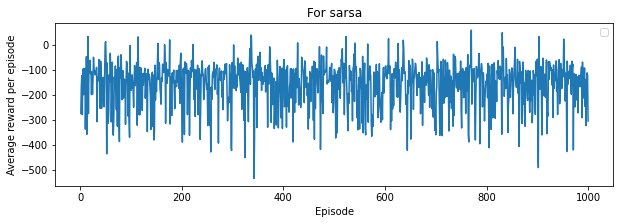

For learning rate = 0.005 epsilon= 0.9


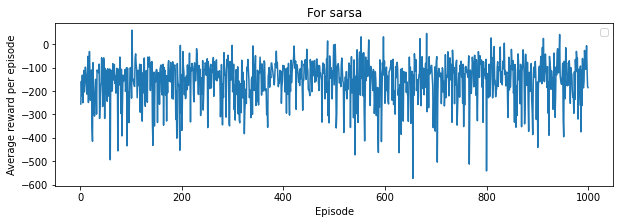

In [ ]:
# Q2
env = gym.make("LunarLander-v2",render_mode="none")
env.reset()
alpha = [0.0005,0.005,0.01,0.1]
epsilon= [0.9, 0.5, 0.3, 0.1]
num_ep=1000
mx_step=500
gamma=0.99
sum = []

sarsa_qfunction = []
expectedsarsa_qfunction = []

for eps in epsilon:
  for lr in alpha:
    q1,reward1,eps1,max_time_step1=sarsa(lr,num_ep,mx_step,eps)
    q2,reward2,eps2,max_time_step2=expectedsarsa(lr,num_ep,mx_step,eps)
    sarsa_qfunction.append(q1)
    expectedsarsa_qfunction.append(q2)

    # ploting the data for sarsa
    plt.figure(figsize = (10,3))
    plt.legend()
    plt.xlabel('Episode')
    plt.ylabel('Average reward per episode')
    plt.title('For sarsa')
    print("For learning rate =",lr,"epsilon=",eps)
    plt.plot(eps1,reward1)
    plt.show()


In [ ]:
for eps in epsilon:
  for lr in alpha:
    # ploting the data for expectedsarsa
    plt.figure(figsize = (10,3))
    plt.legend()
    plt.xlabel('Episode')
    plt.ylabel('Average reward per episode')
    plt.title('For expected sarsa')
    print("For learning rate =",lr,"epsilon=",eps)
    plt.plot(eps1,reward1)
    plt.show()

Observation: For epsilon =0.9 , alpha = 0.01 the model is giving best average returns